In [112]:
# Import neccesary modules
import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set(rc={'figure.figsize': (16, 8)})

from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [113]:
# Read in data
df = pd.read_csv("NFL Concussion Injuries 2012-2014.csv")
df.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              392 non-null    object 
 1   Player                          392 non-null    object 
 2   Team                            392 non-null    object 
 3   Game                            392 non-null    object 
 4   Date                            392 non-null    object 
 5   Opposing Team                   392 non-null    object 
 6   Position                        392 non-null    object 
 7   Pre-Season Injury?              392 non-null    object 
 8   Winning Team?                   392 non-null    object 
 9   Week of Injury                  392 non-null    int64  
 10  Season                          392 non-null    object 
 11  Weeks Injured                   392 non-null    int64  
 12  Games Missed                    361 

In [115]:
# Convert date to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [116]:
# Data Cleaning for Play Time After Injury
df["Play Time After Injury"] = df["Play Time After Injury"].replace("Did not return from injury", 0)
df["Play Time After Injury"].fillna(0, inplace=True)
df['Play Time After Injury'] = df['Play Time After Injury'].str.replace(r'\D+', '', regex=True).fillna(0)
df['Play Time After Injury'] = df['Play Time After Injury'].astype(int)

In [117]:
# Data Cleaning for Average Playtime Before Injury
df["Average Playtime Before Injury"].fillna(0, inplace=True)
df['Average Playtime Before Injury'] = df['Average Playtime Before Injury'].str.replace(r'\D+', '', regex=True).fillna(0)
df['Average Playtime Before Injury'] = df['Average Playtime Before Injury'].astype(int)

In [118]:
df.describe()

,Week of Injury,Weeks Injured,Games Missed,Total Snaps,Play Time After Injury,Average Playtime Before Injury
count,392.000000,392.000000,361.000000,392.000000,392.000000,392.000000
mean,8.548469,0.920918,0.925208,32.038265,38.505102,4125.609694
std,5.004111,0.270211,1.742429,22.228552,28.853630,2431.476362
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,14.000000,12.000000,2250.000000
50%,9.000000,1.000000,0.000000,29.000000,38.000000,4331.500000
75%,13.000000,1.000000,1.000000,48.000000,64.000000,6218.500000
max,19.000000,1.000000,14.000000,93.000000,99.000000,8467.000000


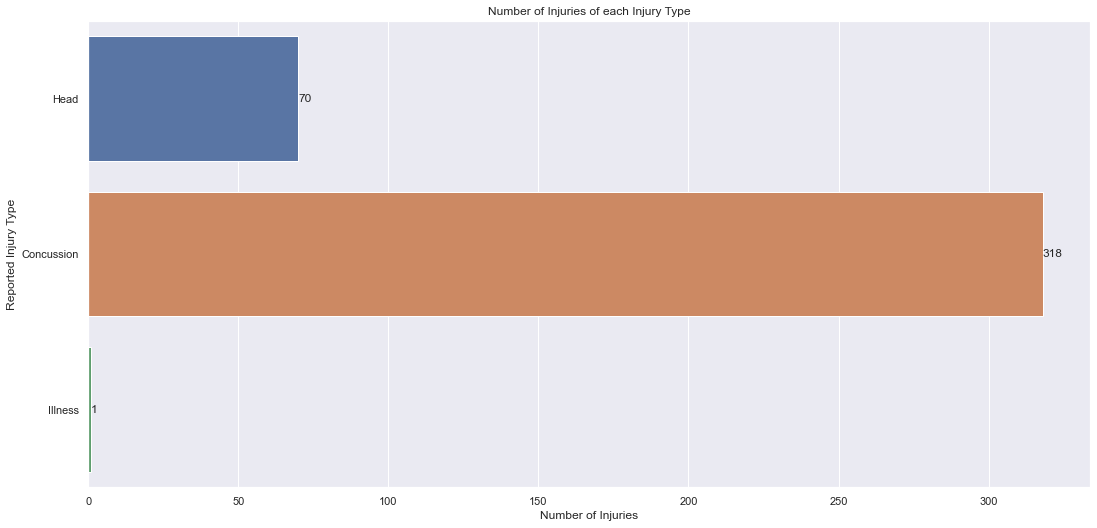

In [119]:
plot = sns.countplot(y="Reported Injury Type", data=df)
plt.bar_label(plot.containers[0])
plt.xlabel("Number of Injuries")
plt.title("Number of Injuries of each Injury Type")
plt.show()

([<matplotlib.patches.Wedge at 0x1e555800250>,
 [Text(-1.3861002140808052, 0.8951123932362608, 'Concussion'),
  Text(1.3788261541990263, -0.9062772404163768, 'Head'),
  Text(1.6499461930420007, -0.013325166648456194, 'Illness')],
 [Text(-0.7560546622258936, 0.4882431235834149, '81.75%'),
  Text(0.7520869931994688, -0.49433304022711455, '17.99%'),
  Text(0.899970650750182, -0.007268272717339741, '0.26%')])

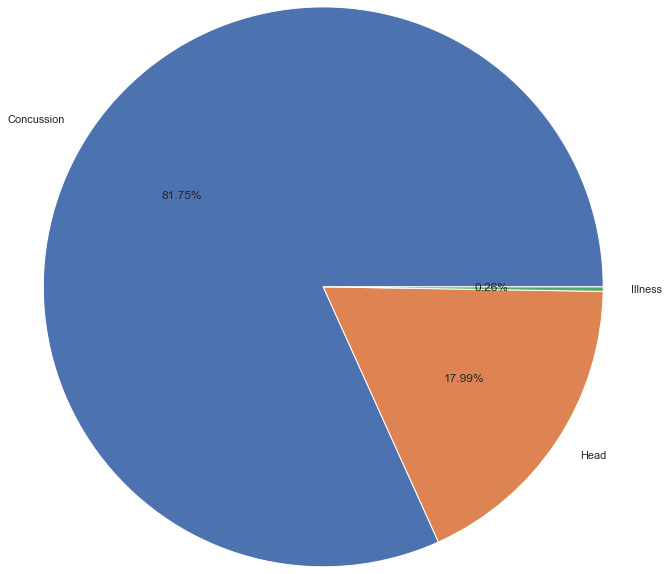

In [120]:
types = df.groupby('Reported Injury Type').size().reset_index().rename(columns = {0:'counts'})
plt.pie(types.counts,autopct='%1.2f%%',labels = types['Reported Injury Type'],radius=1.5,labeldistance=1.1 , rotatelabels=False)

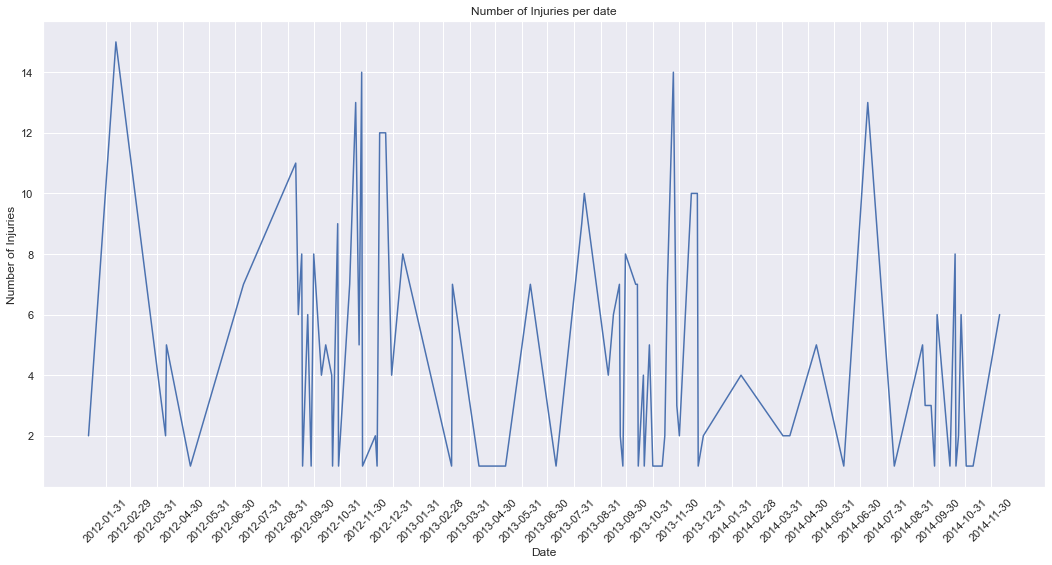

In [121]:
injuries_by_date = df.groupby(["Date"], sort=True)["ID"].count()

sns.lineplot(x=injuries_by_date.index, y=injuries_by_date.values)

plt.xticks(pd.date_range(injuries_by_date.index[0], injuries_by_date.index[-1], freq="M"), rotation=45)

plt.xlabel("Date")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries per date")

plt.show()

In [122]:
injuries_by_date.sort_index(inplace=True)
injuries_by_date = injuries_by_date.to_frame()

In [123]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(injuries_by_date, period=int(len(injuries_by_date)/2))

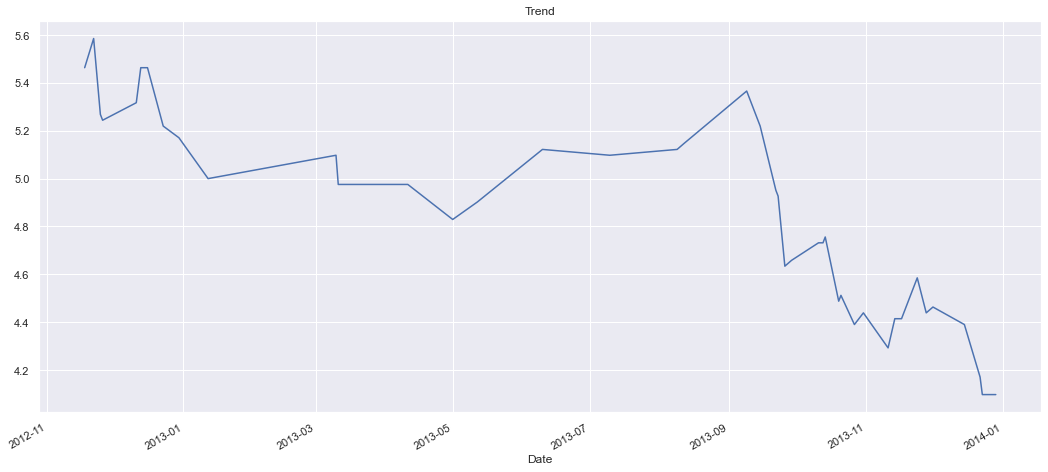

In [124]:
ax = decomp.trend.plot()

ax.set_xlabel('Date')
ax.set_title('Trend')

plt.show()

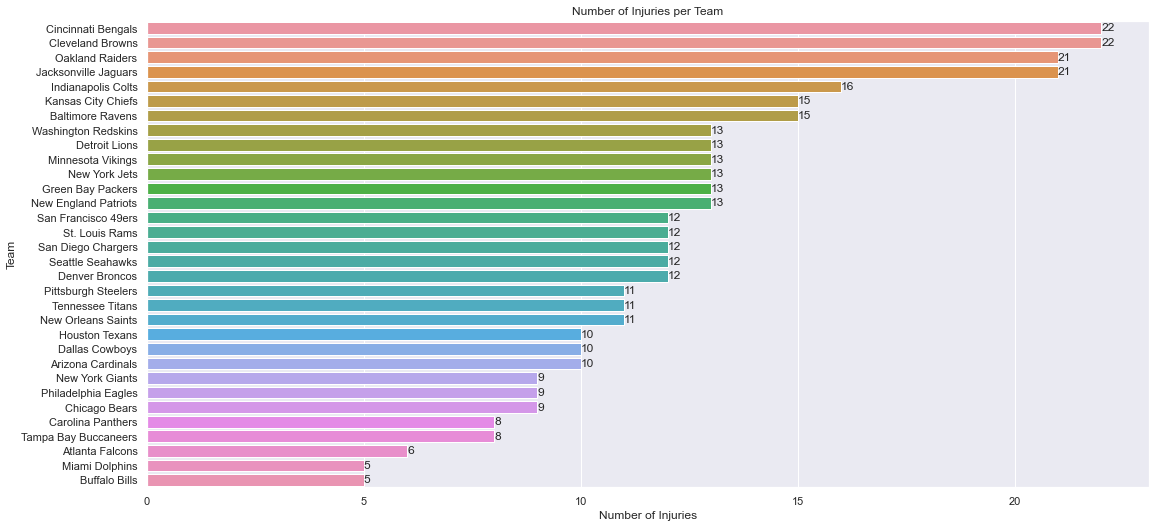

In [125]:
plot = sns.countplot(y="Team", data=df, order = df['Team'].value_counts().index)
plt.bar_label(plot.containers[0])
plt.xlabel("Number of Injuries")
plt.ylabel("Team")
plt.title("Number of Injuries per Team")
plt.show()

In [126]:
pd.pivot_table(df, index=["Team"], columns="Reported Injury Type", aggfunc="count") \
                ["Game"].sort_values("Concussion", ascending=False).fillna(0)

Reported Injury Type,Concussion,Head,Illness
Team,,,
Oakland Raiders,21.0,0.0,0.0
Jacksonville Jaguars,20.0,1.0,0.0
Cincinnati Bengals,17.0,4.0,0.0
Minnesota Vikings,13.0,0.0,0.0
New York Jets,13.0,0.0,0.0
Green Bay Packers,13.0,0.0,0.0
San Diego Chargers,12.0,0.0,0.0
San Francisco 49ers,12.0,0.0,0.0
Cleveland Browns,12.0,10.0,0.0


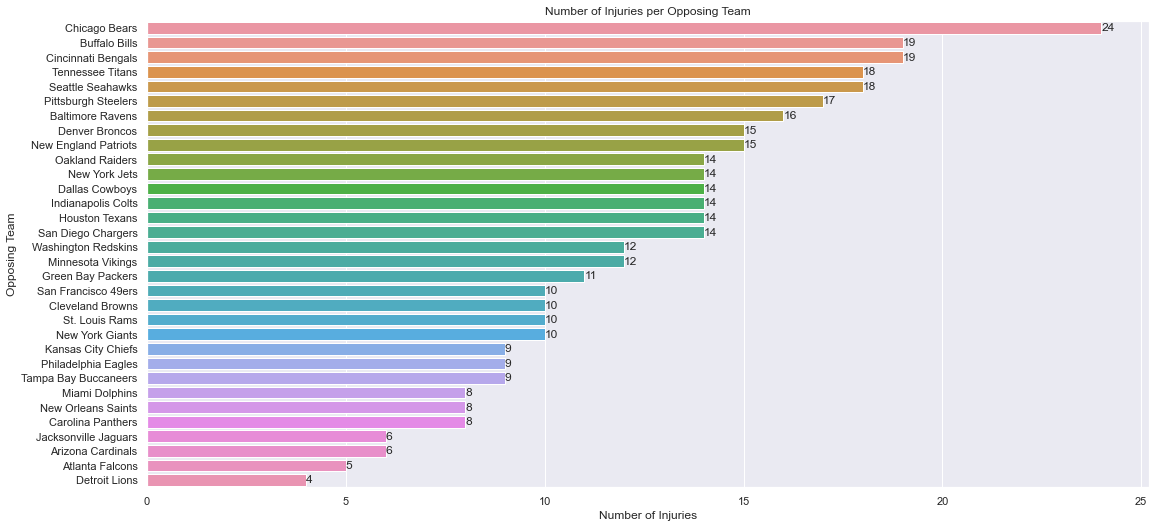

In [127]:
plot = sns.countplot(y="Opposing Team", data=df, order = df['Opposing Team'].value_counts().index)
plt.bar_label(plot.containers[0])
plt.xlabel("Number of Injuries")
plt.ylabel("Opposing Team")
plt.title("Number of Injuries per Opposing Team")
plt.show()

In [128]:
pd.pivot_table(df, index=["Opposing Team"], columns="Reported Injury Type", aggfunc="count") \
                ["Game"].sort_values("Concussion", ascending=False).fillna(0)

Reported Injury Type,Concussion,Head,Illness
Opposing Team,,,
Chicago Bears,19.0,5.0,0.0
Tennessee Titans,17.0,0.0,0.0
Seattle Seahawks,15.0,2.0,0.0
Baltimore Ravens,14.0,2.0,0.0
Buffalo Bills,14.0,5.0,0.0
Cincinnati Bengals,14.0,5.0,0.0
New York Jets,14.0,0.0,0.0
Indianapolis Colts,13.0,1.0,0.0
Houston Texans,13.0,1.0,0.0


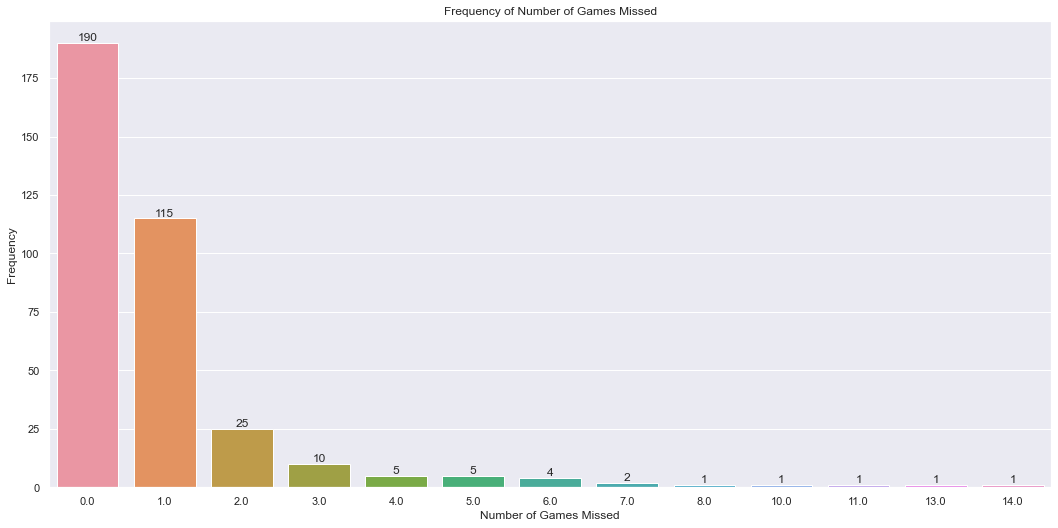

In [129]:
plot = sns.countplot(x="Games Missed", data=df)
plt.bar_label(plot.containers[0])
plt.xlabel("Number of Games Missed")
plt.ylabel("Frequency")
plt.title("Frequency of Number of Games Missed")
plt.show()

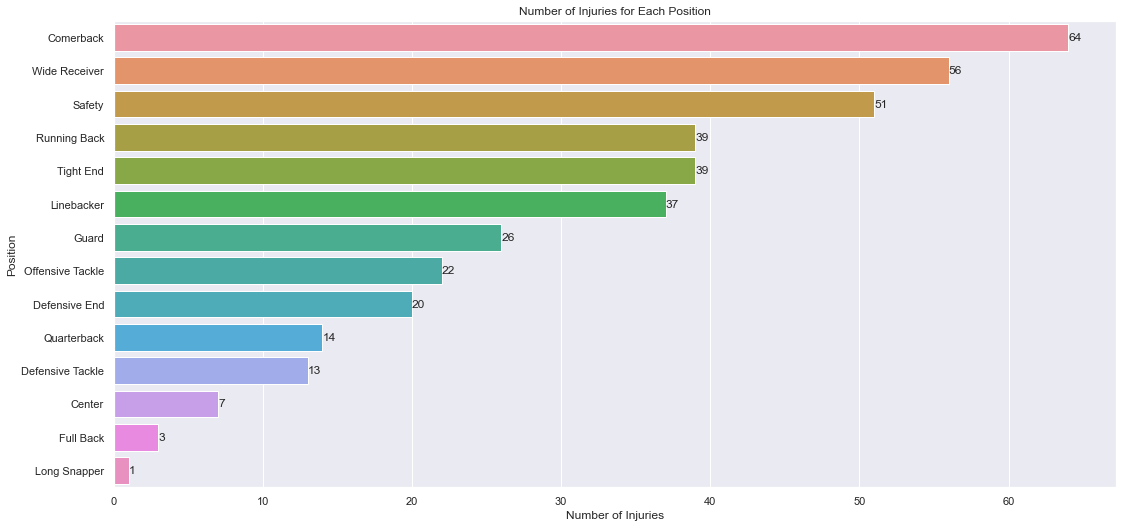

In [130]:
inj_by_pos = df["Position"].value_counts()
plot = sns.barplot(y=inj_by_pos.index, x=inj_by_pos.values)
plt.bar_label(plot.containers[0])

plt.xlabel("Number of Injuries")
plt.ylabel("Position")
plt.title("Number of Injuries for Each Position")

plt.show()

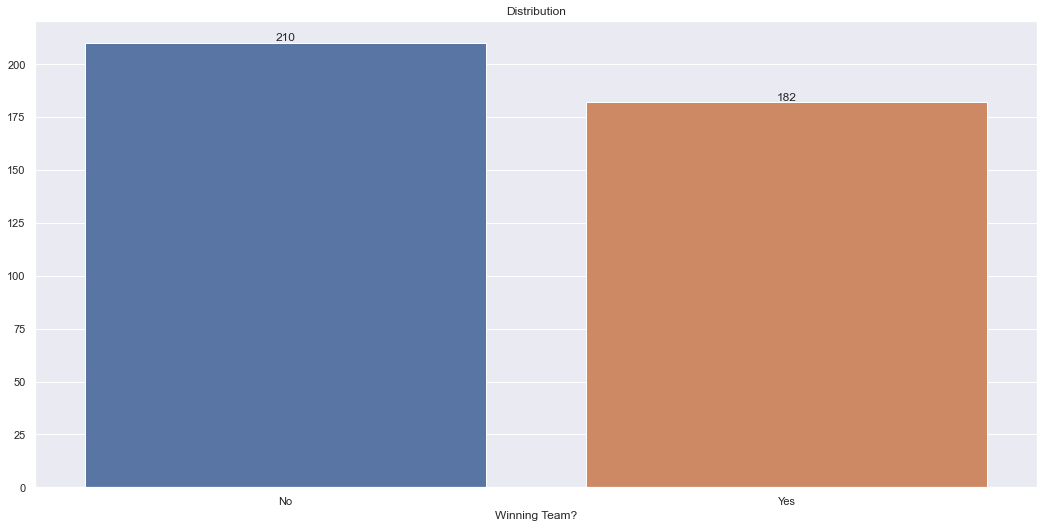

In [131]:
inj_by_win = df["Winning Team?"].value_counts()
plot = sns.barplot(x=inj_by_win.index, y=inj_by_win.values)
plt.bar_label(plot.containers[0])

plt.xlabel("Winning Team?")
plt.title("Distribution")

plt.show()

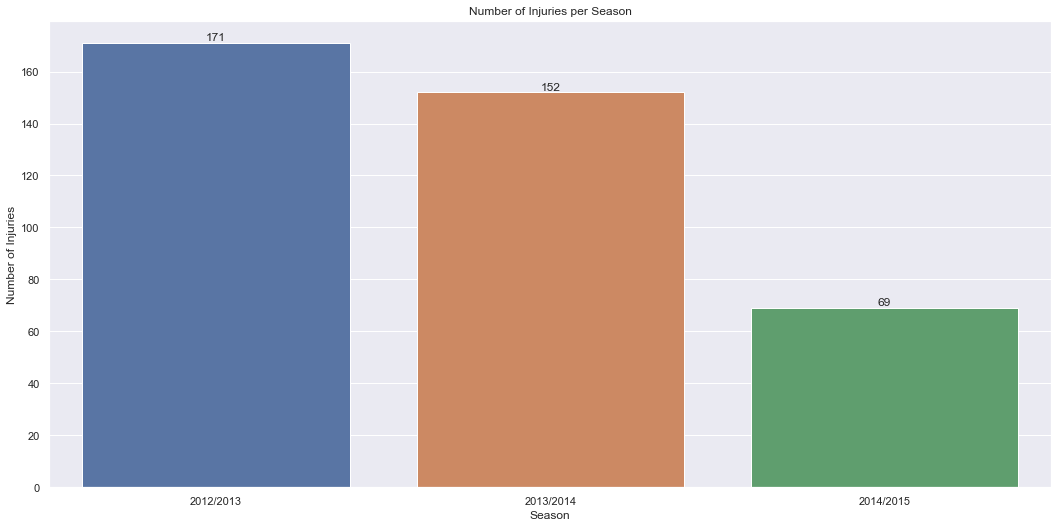

In [132]:
by_season = df["Season"].value_counts()
plot = sns.barplot(x=by_season.index, y=by_season.values)
plt.bar_label(plot.containers[0])

plt.xlabel("Season")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries per Season")


plt.show()

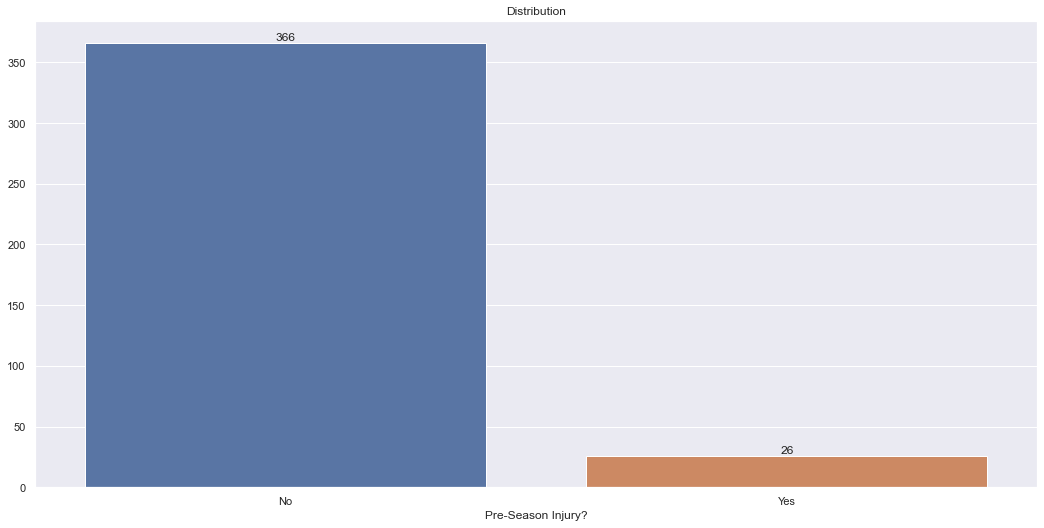

In [133]:
pre_season = df["Pre-Season Injury?"].value_counts()
plot = sns.barplot(x=pre_season.index, y=pre_season.values)
plt.bar_label(plot.containers[0])

plt.xlabel("Pre-Season Injury?")
plt.title("Distribution")
plt.show()

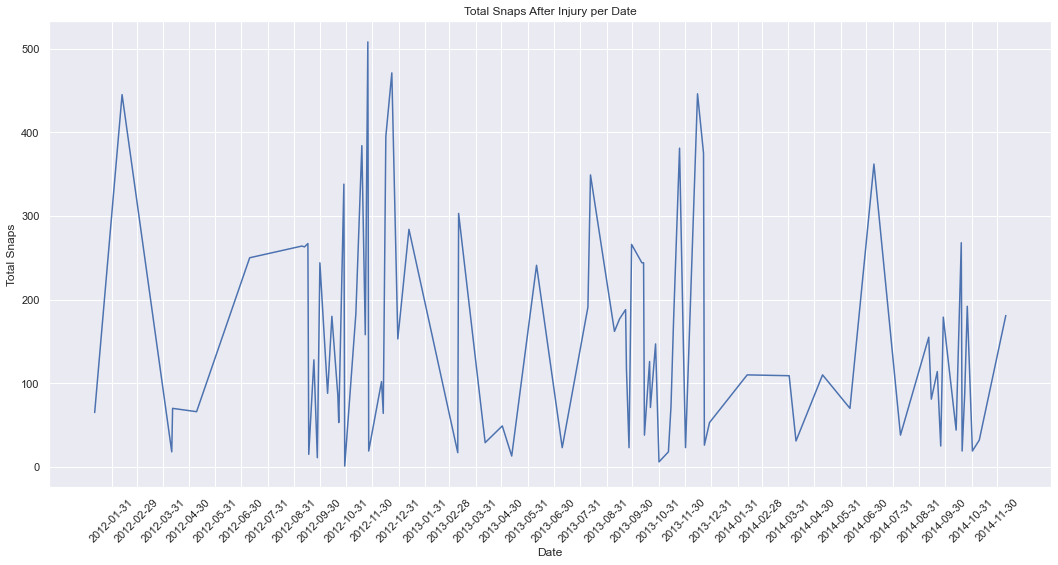

In [134]:
snaps = df.groupby("Date")["Total Snaps"].sum()
sns.lineplot(x=snaps.index, y=snaps.values)
plt.xticks(pd.date_range(snaps.index[0], snaps.index[-1], freq="M"), rotation=45)

plt.xlabel("Date")
plt.ylabel("Total Snaps")
plt.title("Total Snaps After Injury per Date")


plt.show()

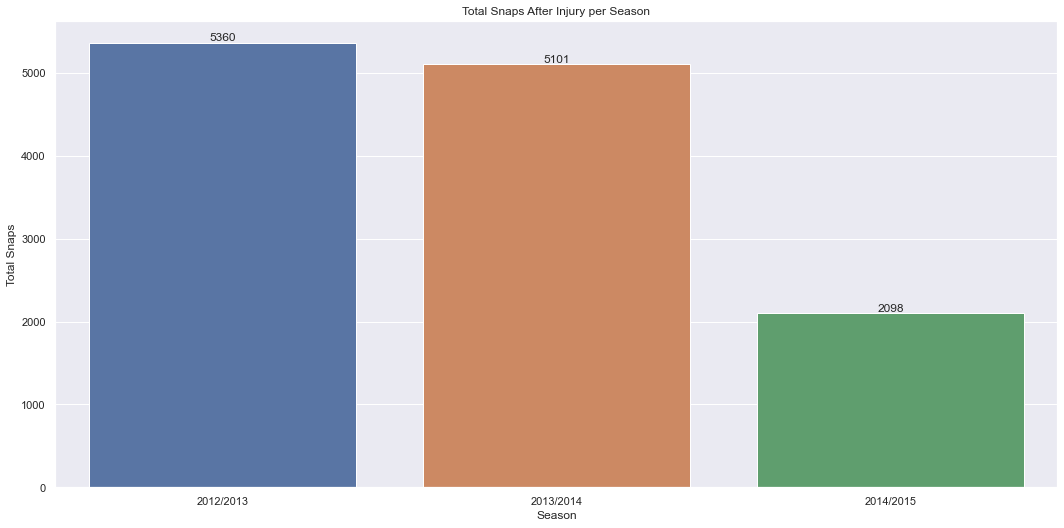

In [135]:
by_sea_snaps = df.groupby("Season")["Total Snaps"].sum()
plot = sns.barplot(x=by_sea_snaps.index, y=by_sea_snaps.values)
plt.bar_label(plot.containers[0])

plt.xlabel("Season")
plt.ylabel("Total Snaps")
plt.title("Total Snaps After Injury per Season")


plt.show()

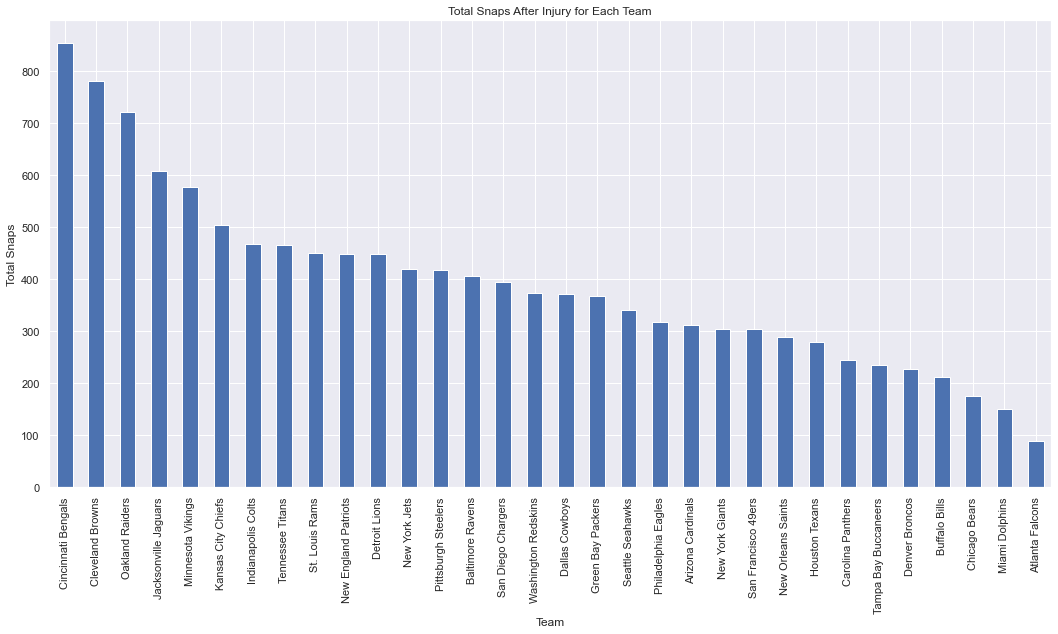

In [136]:
df.groupby(["Team"])["Total Snaps"].sum().sort_values(ascending=False).plot(kind="bar")

plt.xlabel("Team")
plt.ylabel("Total Snaps")
plt.title("Total Snaps After Injury for Each Team")


plt.show()

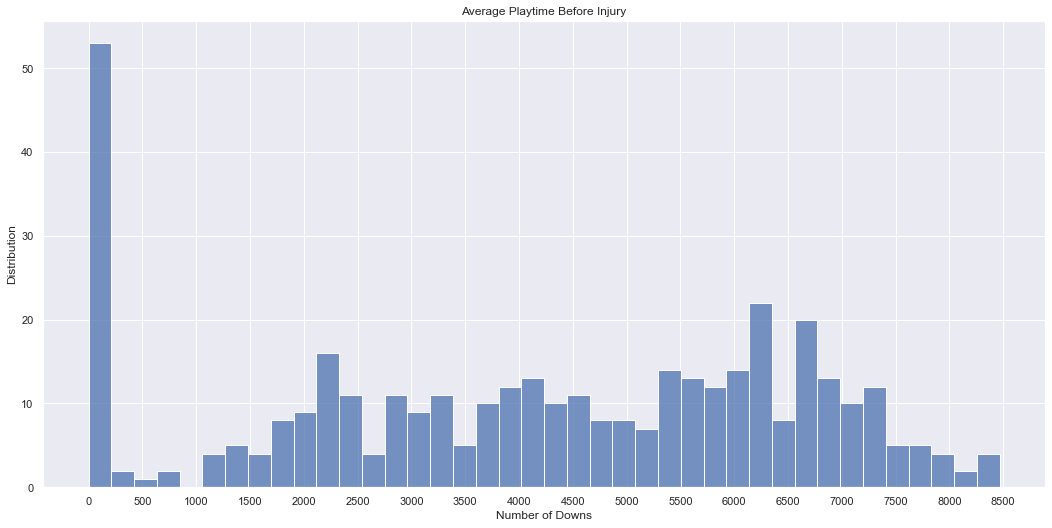

In [137]:
sns.histplot(x='Average Playtime Before Injury', data=df, bins=40)
plt.xticks(np.arange(0, 9000, 500))

plt.xlabel("Number of Downs")
plt.ylabel("Distribution")
plt.title("Average Playtime Before Injury")

plt.show()


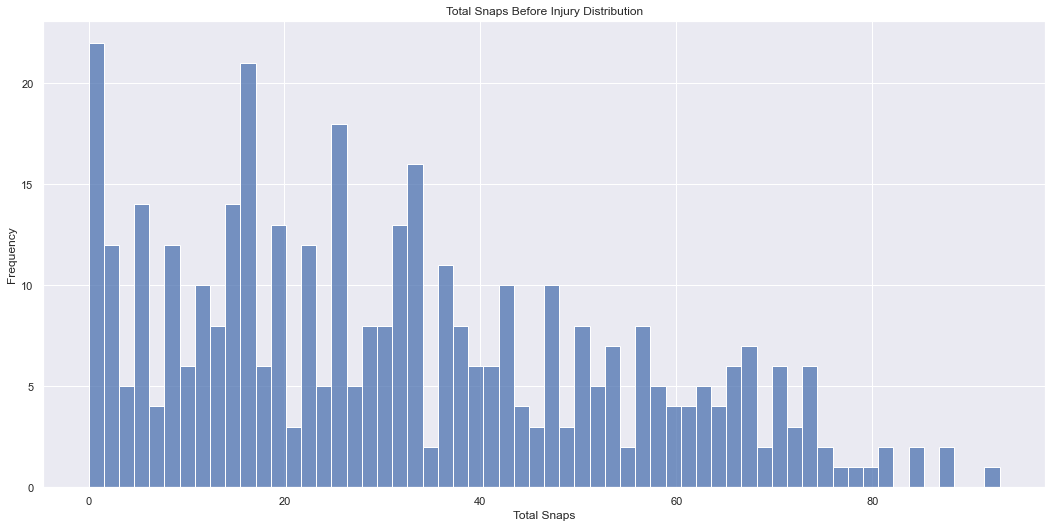

In [138]:
sns.histplot(x="Total Snaps", bins=60,data=df)

plt.xlabel("Total Snaps")
plt.ylabel("Frequency")
plt.title("Total Snaps Before Injury Distribution")

plt.show()

### Machine Learning

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              392 non-null    object        
 1   Player                          392 non-null    object        
 2   Team                            392 non-null    object        
 3   Game                            392 non-null    object        
 4   Date                            392 non-null    datetime64[ns]
 5   Opposing Team                   392 non-null    object        
 6   Position                        392 non-null    object        
 7   Pre-Season Injury?              392 non-null    object        
 8   Winning Team?                   392 non-null    object        
 9   Week of Injury                  392 non-null    int64         
 10  Season                          392 non-null    object        
 11  Weeks 

In [140]:
categories = ["Team", "Opposing Team", "Position", "Pre-Season Injury?", "Winning Team?", "Week of Injury", "Season", "Unknown Injury?", "Reported Injury Type"]

In [141]:
y = df["Games Missed"]
df = df.drop(["Games Missed", "ID", "Player", "Date", "Game"], axis=1)

In [142]:
df = pd.get_dummies(df, drop_first=True, columns=categories)
df.head()

,Weeks Injured,Total Snaps,Play Time After Injury,Average Playtime Before Injury,Team_Atlanta Falcons,Team_Baltimore Ravens,Team_Buffalo Bills,Team_Carolina Panthers,Team_Chicago Bears,Team_Cincinnati Bengals,...,Week of Injury_15,Week of Injury_16,Week of Injury_17,Week of Injury_18,Week of Injury_19,Season_2013/2014,Season_2014/2015,Unknown Injury?_Yes,Reported Injury Type_Head,Reported Injury Type_Illness
0,1,0,14,3700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,78,7350,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,25,1750,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,82,4150,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [143]:
x=df

In [144]:
y.fillna(0, inplace=True)

In [146]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [149]:
KFold_Score = pd.DataFrame()
classifiers = ['LinearRegression', 'RandomForestRegressor','GradientBoostingRegressor', 'AdaBoostRegressor']
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=200, random_state=0),
          GradientBoostingRegressor(random_state=0),
          AdaBoostRegressor(random_state=0)]

In [150]:
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = -(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv))
    j = j+1

In [151]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4', 'Fold 5', 'Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = True)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestRegressor,0.880909,0.873545,0.822909,1.124636,0.954815,0.931363
GradientBoostingRegressor,0.902105,0.921593,0.975944,1.057020,1.062337,0.983800
AdaBoostRegressor,1.373720,1.143086,1.021589,1.459913,1.357133,1.271088
LinearRegression,1.338020,1.526353,1.400358,1.565802,1.579002,1.481907


#### Random Forest Regressor has lowest mean absolute error - use this model to # games missed

In [152]:
model = RandomForestRegressor(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [155]:
feature_importance = pd.DataFrame(data=model.feature_importances_, index=X_train.columns)
feature_importance.rename(columns={0: "Factors"}, inplace=True)
feature_importance.head(10)

,Factors
Weeks Injured,0.010159
Total Snaps,0.110424
Play Time After Injury,0.133740
Average Playtime Before Injury,0.062317
Team_Atlanta Falcons,0.000450
Team_Baltimore Ravens,0.000504
Team_Buffalo Bills,0.000409
Team_Carolina Panthers,0.003203
Team_Chicago Bears,0.000023
Team_Cincinnati Bengals,0.001775


In [156]:
feature_importance = feature_importance["Factors"].nlargest(10)

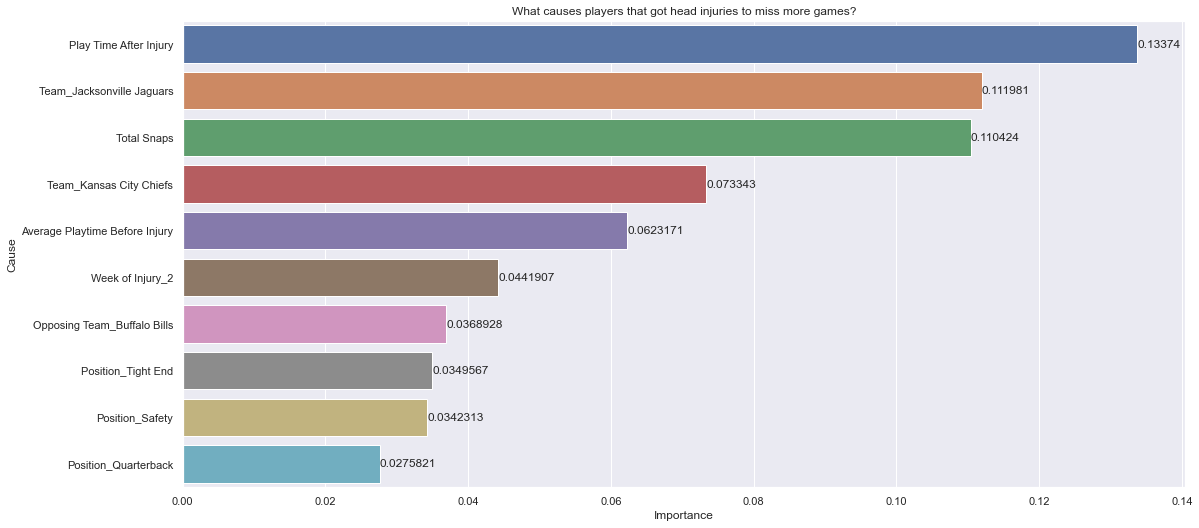

In [158]:
plot=sns.barplot(y=feature_importance.index, x=feature_importance.values)
plt.bar_label(plot.containers[0])
plt.xlabel("Importance")
plt.ylabel("Cause")
plt.title("What causes players that got head injuries to miss more games?")
plt.show()